<a href="https://colab.research.google.com/github/bhomaidan1990/Computer_Vision_Labs/blob/main/CV_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision, Lab(3)
## construct sliding windows multi-scale

In [ ]:
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [ ]:
# Local Jupyter conda env
# pip install imutils
# !pip install -U scikit-image

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-image in /Users/junyi/Library/Python/2.7/lib/python/site-packages (0.14.5)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


image size: (450, 235, 3)


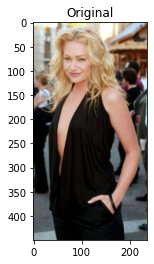

In [ ]:
import os
import cv2
import math
import imutils
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
imgPath = "/Users/junyi/Desktop/00UGA-M2/AIW/ComputerVision/Dataset/originalPics/2002/08/05/big/img_3044.jpg"

img = cv2.imread(imgPath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Original')
print('image size:',img.shape)

image size (450, 235, 3)
image size (225, 118, 3)
image size (113, 59, 3)
image size (57, 30, 3)


<Figure size 432x288 with 0 Axes>

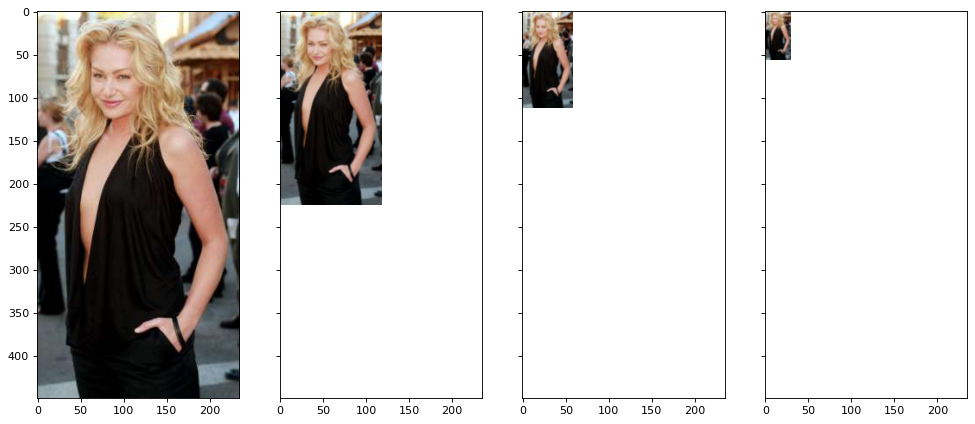

In [ ]:
# Down sampling
plt.figure()
pyramid = []
dst = img
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,8),dpi=80,sharex=True,sharey=True)

pyramid.append(dst)
for i in range(0,3):
    dst = cv2.pyrDown(dst)
    pyramid.append(dst)

for i in range(len(pyramid)-1,-1,-1):
    print('image size',pyramid[len(pyramid)-1-i].shape) # reduce 1/2 image size recursively
    ax[i].imshow(pyramid[i])  

image size (900, 470, 3)


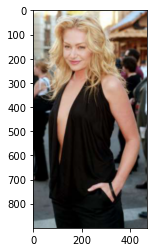

In [ ]:
#Up sampling
plt.figure()
dst = cv2.pyrUp(img)
plt.imshow(dst)
print("image size", dst.shape)

image size (57, 30, 3)
image size (114, 60, 3)
image size (228, 120, 3)
image size (456, 240, 3)


<Figure size 432x288 with 0 Axes>

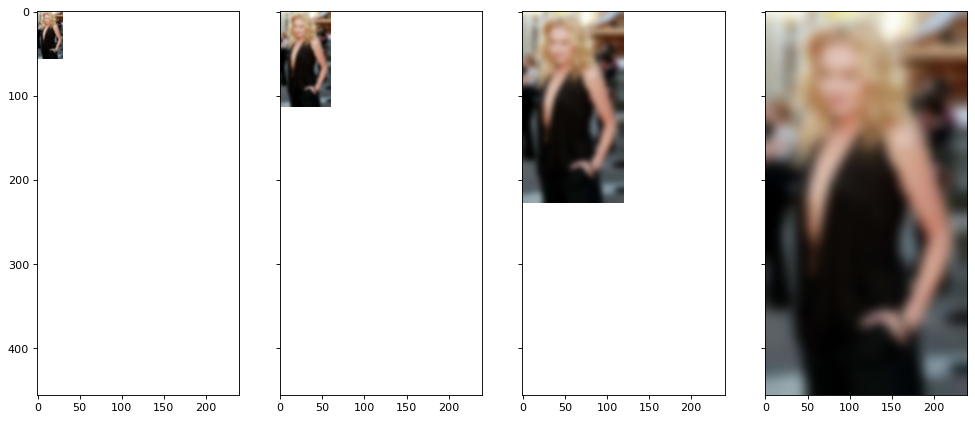

In [ ]:
# UP sampling 
plt.figure()
dst = pyramid[3]
pyramid = []
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,8),dpi=80,sharex=True,sharey=True)
pyramid.append(dst)
for i in range(0,3): 
    dst = cv2.pyrUp(dst)
    pyramid.append(dst)

for i in range(len(pyramid)):
    print('image size',pyramid[i].shape) # reduce 1/2 image size recursively
    ax[i].imshow(pyramid[i]) 

up sampling and down simpleing inversible process

## Gaussian with intermediate scale
### Gaussian smoothing(example in gray image)

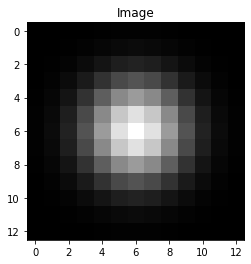

Found 3 Channels : (450, 235, 3)
Converted to Gray Channel. Size : (450, 235)
Kernel Shape : (13, 13)


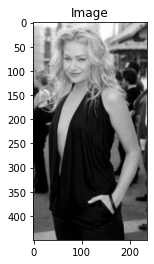

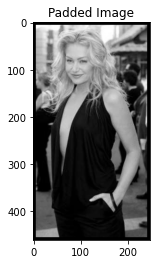

Output Image size : (450, 235)


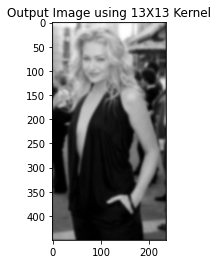

array([[13.53425076, 17.50671851, 20.23523322, ..., 12.48730894,
        10.41525245,  7.84784972],
       [17.50939186, 22.64578764, 26.16973095, ..., 15.50735302,
        12.82167013,  9.59136139],
       [20.22014459, 26.14424285, 30.19899647, ..., 16.94208596,
        13.8491543 , 10.26142224],
       ...,
       [12.53711687, 16.25076086, 18.83463397, ..., 10.17510537,
         8.7652651 ,  6.74970582],
       [10.82310431, 14.02274167, 16.24304991, ...,  8.84871357,
         7.63458931,  5.88552476],
       [ 8.35272305, 10.81758881, 12.52374422, ...,  6.87062456,
         5.936173  ,  4.58058316]])

In [ ]:
#ref : http://www.adeveloperdiary.com/data-science/computer-vision/applying-gaussian-smoothing-to-an-image-using-python-from-scratch/
#create a guassian kernel/Filter
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_kernel(size, sigma=2, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    #Compute the outer product of two vectors.
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    
    #Normalize 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.figure()
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D
#print(gaussian_kernel(5, sigma=2, verbose=True))

#Perform Convolution and average
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.figure()
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.figure()
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.figure()
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
 
    return output
   
#Gussian smoothing
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=2, verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)


image = cv2.imread(imgPath)

gaussian_blur(image, 13, verbose=True)


## Method 1 using imutile library

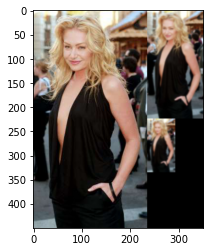

In [ ]:
def pyramid_single(image, scale=30):
    # compute the new dimensions of the image and resize it
    w = int(image.shape[1] / scale)
    #Gaussian smoothing 
    image = cv2.GaussianBlur(image,(13,13),2)
    #down sampling
    image = imutils.resize(image, width=w)
    return image

def pyramid(image, scale=1.5, minSize=(30, 30)):
    # yield the original image
    yield image/255
    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        #Gaussian smoothing ref: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
        image = cv2.GaussianBlur(image,(13,13),2)
        image = imutils.resize(image, width=w)
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        # yield the next image in the pyramid
        yield image/255   #Clipping input data to the valid range for imshow with RGB data [0..1]


pyramid = tuple(pyramid(img, scale=2))   
rows, cols, dim = img.shape
composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)
composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()

## Method2 using scikit-image library

In [ ]:
conda install scikit-image

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/junyi/Anaconda3/anaconda3/envs/cv_env

  added / updated specs:
    - scikit-image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cloudpickle-1.6.0          |             py_0          30 KB
    cytoolz-0.11.0             |   py37haf1e3a3_0         289 KB
    dask-core-2.30.0           |             py_0         605 KB
    networkx-2.5               |             py_0         1.1 MB
    openssl-1.1.1h             |       haf1e3a3_0         2.2 MB
    pywavelets-1.1.1           |   py37haf1e3a3_2         3.4 MB
    scikit-image-0.17.2        |   py37h81aa140_0         8.8 MB
    tifffile-2020.10.1         |   py37h0cf3a3e_2        

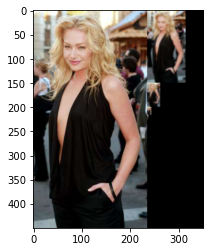

In [ ]:
from skimage import transform

rows, cols,dim = img.shape
pyramid = tuple(transform.pyramid_gaussian(img,downscale=3,sigma=3,multichannel=True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)
composite_image[:rows,:cols,:] = pyramid[0]

i_row = 0
for p in pyramid[1:]: 
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig,ax = plt.subplots()
ax.imshow(composite_image)
plt.show()  

## Lapacian pyramid

(450, 234, 3) (450, 234, 3)
(224, 116, 3) (224, 116, 3)
(112, 58, 3) (112, 58, 3)
(56, 28, 3) (56, 28, 3)


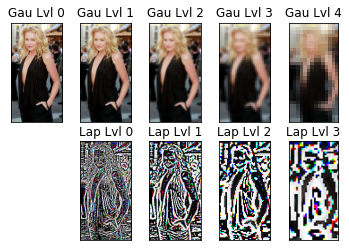

In [ ]:
#imgFile = '../2003/01/01/big/img_458.jpg'
 
# load an original image
#img = cv2.imread(imgFile)
################################################################################
 
# color value range
cRange = 256
 
# convert color space from bgr to gray
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
################################################################################
 
# pyramid level
level = 4
 
# original image at the bottom of gaussian pyramid
higherResoGauss = img
plt.subplot(2,1 + level,1), plt.imshow(higherResoGauss), plt.title('Gau Lvl 0'), plt.xticks([]), plt.yticks([])
 
for l in range(level):
    
    rows,cols,channels = higherResoGauss.shape
    
    # delete last odd row of gaussian image
    if rows % 2 == 1:
        higherResoGauss = higherResoGauss[:rows - 1,:]
    # delete last odd column of gaussian image                
    if cols % 2 == 1:
        higherResoGauss = higherResoGauss[:,:cols - 1]
             
    # gaussian image
    lowerResoGauss = cv2.pyrDown(higherResoGauss)    
    # even rows and cols in up-sampled image
    temp = cv2.pyrUp(lowerResoGauss)    
    print (higherResoGauss.shape,temp.shape)
    
    # laplacian image
    lowerResoLap = higherResoGauss - temp   
    
    # display gaussian and laplacian pyramid
    plt.subplot(2,1 + level,l + 2), plt.imshow(lowerResoGauss), plt.title('Gau Lvl ' + '%d' % (l+1)), plt.xticks([]), plt.yticks([])
    plt.subplot(2,1 + level,1 + level + l + 2), plt.imshow(lowerResoLap), plt.title('Lap Lvl ' + '%d' % (l)), plt.xticks([]), plt.yticks([])    
 
    higherResoGauss = lowerResoGauss
################################################################################
               
# display original image and gray image
plt.show()